In [1]:
"""
Dog vs Cat Image Classifier
Author: April Atkinson
Description: Build a simple neural network to classify dog and cat images
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.20.0
Keras version: 3.13.2
GPU available: []


In [2]:
# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

print(f"Full dataset shape - Training: {x_train_full.shape}, Test: {x_test_full.shape}")
print(f"Full dataset labels - Training: {y_train_full.shape}, Test: {y_test_full.shape}")

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("\nCIFAR-10 classes:")
for i, name in enumerate(class_names):
    print(f"  {i}: {name}")

# Filter to cats (3) and dogs (5)
cat_class = 3
dog_class = 5

# Training set
train_cat_mask = (y_train_full.flatten() == cat_class)
train_dog_mask = (y_train_full.flatten() == dog_class)
train_mask = train_cat_mask | train_dog_mask

x_train = x_train_full[train_mask]
y_train = y_train_full[train_mask]

# Convert labels: cat=0, dog=1
y_train = np.where(y_train == cat_class, 0, 1)

# Test set
test_cat_mask = (y_test_full.flatten() == cat_class)
test_dog_mask = (y_test_full.flatten() == dog_class)
test_mask = test_cat_mask | test_dog_mask

x_test = x_test_full[test_mask]
y_test = y_test_full[test_mask]

# Convert labels: cat=0, dog=1
y_test = np.where(y_test == dog_class, 1, 0)

print(f"\nFiltered dataset:")
print(f"  Training: {x_train.shape[0]} images")
print(f"  Test: {x_test.shape[0]} images")
print(f"  Image shape: {x_train.shape[1:]}")

# Check class distribution
print(f"\nTraining set - Cats: {(y_train == 0).sum()}, Dogs: {(y_train == 1).sum()}")
print(f"Test set - Cats: {(y_test == 0).sum()}, Dogs: {(y_test == 1).sum()}")

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images for simple neural network (32x32x3 = 3072)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(f"\nFlattened shape: {x_train_flat.shape}")


Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


/opt/anaconda3/envs/m1_04_nn/lib/python3.11/site-packages/keras/src/datasets/cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Full dataset shape - Training: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Full dataset labels - Training: (50000, 1), Test: (10000, 1)

CIFAR-10 classes:
  0: airplane
  1: automobile
  2: bird
  3: cat
  4: deer
  5: dog
  6: frog
  7: horse
  8: ship
  9: truck

Filtered dataset:
  Training: 10000 images
  Test: 2000 images
  Image shape: (32, 32, 3)

Training set - Cats: 5000, Dogs: 5000
Test set - Cats: 1000, Dogs: 1000

Flattened shape: (10000, 3072)


Saved sample images to 'sample_images.png'


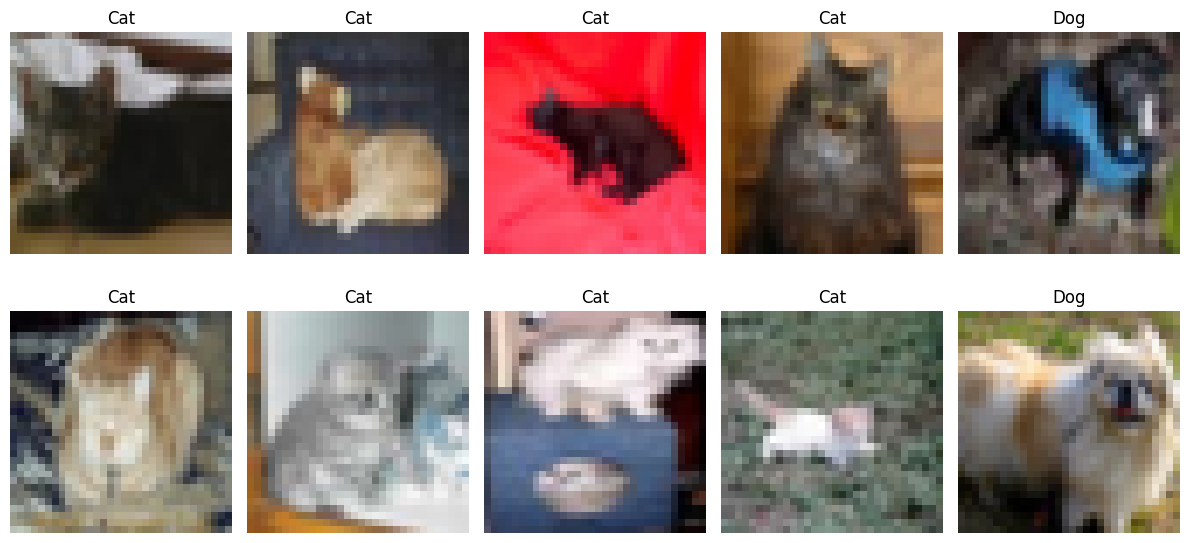

In [3]:
# Visualize some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i])
    label = 'Cat' if y_train[i] == 0 else 'Dog'
    axes[row, col].set_title(label)
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('sample_images.png', dpi=150, bbox_inches='tight')
print("Saved sample images to 'sample_images.png'")
plt.show()


In [4]:
print("\n" + "=" * 50)
print("BUILDING NEURAL NETWORK")
print("=" * 50)

model = keras.Sequential([
    # Input layer: 32 x 32 x 3 = 3072 features
    layers.Dense(128, activation='relu', input_shape=(3072,), name='hidden_layer_1'),
    layers.Dense(64, activation='relu', name='hidden_layer_2'),
    # Output layer: binary classification
    layers.Dense(1, activation='sigmoid', name='output_layer')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nModel Architecture:")
model.summary()

print(f"\nTotal parameters: {model.count_params():,}")



BUILDING NEURAL NETWORK

Model Architecture:


/opt/anaconda3/envs/m1_04_nn/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,665 (1.53 MB)

 Trainable params: 401,665 (1.53 MB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 401,665


In [5]:
print("\n" + "=" * 50)
print("TRAINING THE MODEL")
print("=" * 50)

EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(
    x_train_flat, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test_flat, y_test),
    verbose=1
)

print("\n✓ Training complete!")



TRAINING THE MODEL
Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5530 - loss: 0.6958 - val_accuracy: 0.5910 - val_loss: 0.6679
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5743 - loss: 0.6720 - val_accuracy: 0.5920 - val_loss: 0.6639
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5818 - loss: 0.6690 - val_accuracy: 0.5990 - val_loss: 0.6656
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5879 - loss: 0.6648 - val_accuracy: 0.5965 - val_loss: 0.6624
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5958 - loss: 0.6576 - val_accuracy: 0.5800 - val_loss: 0.6699
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5986 - loss: 0.6560 - val_accuracy: 0.5890 - val_loss: 0.6627
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6049 - loss: 0.6537 - val_accuracy: 0.5870 - val_loss: 0.6718
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6095 - loss: 0.650


EVALUATING THE MODEL
Test Loss: 0.6805
Test Accuracy: 0.5815 (58.15%)
Manual accuracy check: 1163/2000 (58.15%)
Saved training history to 'training_history.png'


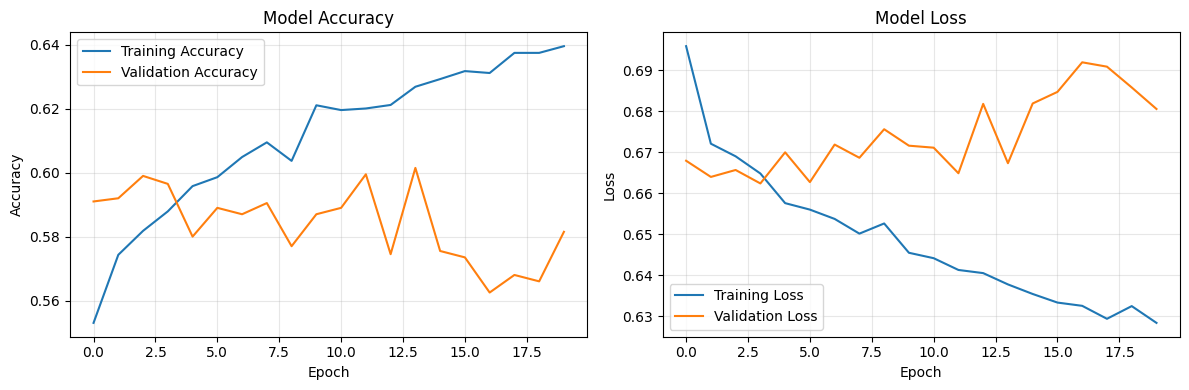


SAMPLE PREDICTIONS
Saved sample predictions to 'sample_predictions.png'


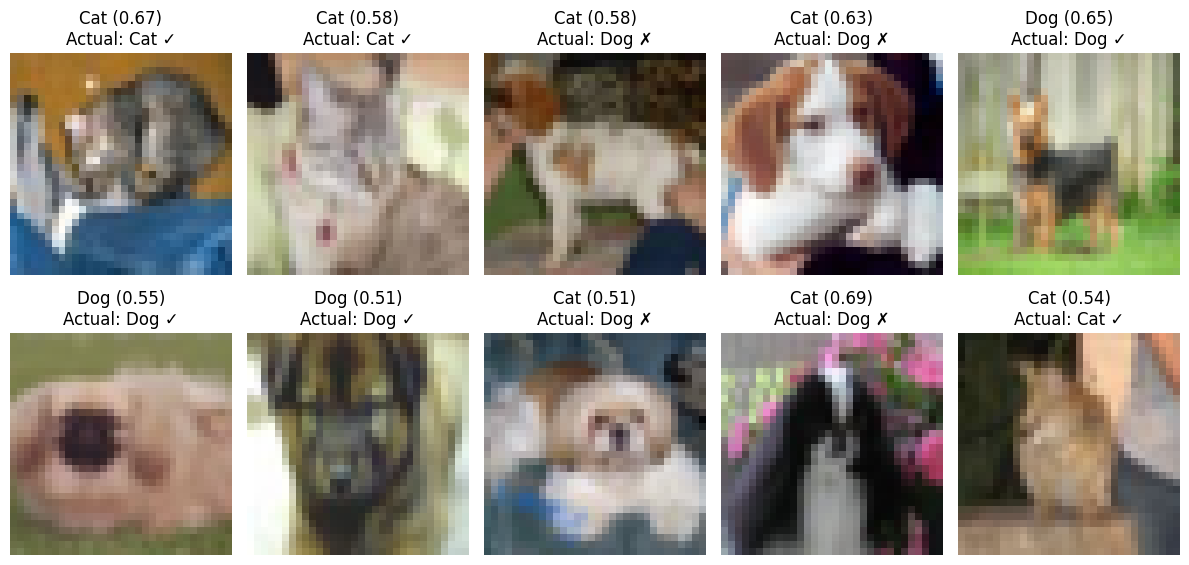

In [6]:
print("\n" + "=" * 50)
print("EVALUATING THE MODEL")
print("=" * 50)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Make predictions on test set
predictions = model.predict(x_test_flat, verbose=0)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Manual accuracy check
correct = (predicted_classes == y_test.flatten()).sum()
total = len(y_test)
print(f"Manual accuracy check: {correct}/{total} ({correct/total*100:.2f}%)")

# Visualize training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
print("Saved training history to 'training_history.png'")
plt.show()

print("\n" + "=" * 50)
print("SAMPLE PREDICTIONS")
print("=" * 50)

# Show sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i in range(10):
    row = i // 5
    col = i % 5

    pred = model.predict(x_test[i].reshape(1, -1), verbose=0)[0][0]
    pred_class = 'Dog' if pred > 0.5 else 'Cat'
    confidence = float(pred) if pred > 0.5 else float(1 - pred)

    actual = 'Dog' if y_test[i] == 1 else 'Cat'
    mark = '✓' if (pred > 0.5) == (y_test[i] == 1) else '✗'

    axes[row, col].imshow(x_test[i])
    axes[row, col].set_title(f'{pred_class} ({confidence:.2f})\nActual: {actual} {mark}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('sample_predictions.png', dpi=150, bbox_inches='tight')
print("Saved sample predictions to 'sample_predictions.png'")
plt.show()


In [8]:
print("\n" + "=" * 50)
print("BUILDING CNN MODEL (better for images)")
print("=" * 50)

cnn_model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

cnn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

cnn_model.summary()



BUILDING CNN MODEL (better for images)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,977 (652.25 KB)

 Trainable params: 166,977 (652.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
print("\n" + "=" * 50)
print("TRAINING CNN MODEL")
print("=" * 50)

EPOCHS = 10
BATCH_SIZE = 32

cnn_history = cnn_model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    verbose=1
)

print("\n✓ CNN training complete!")



TRAINING CNN MODEL
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5750 - loss: 0.6731 - val_accuracy: 0.6470 - val_loss: 0.6360
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6520 - loss: 0.6199 - val_accuracy: 0.6900 - val_loss: 0.5884
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6893 - loss: 0.5788 - val_accuracy: 0.7135 - val_loss: 0.5642
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7115 - loss: 0.5496 - val_accuracy: 0.7225 - val_loss: 0.5475
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7357 - loss: 0.5217 - val_accuracy: 0.7185 - val_loss: 0.5379
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7576 - loss: 0.4948 - val_accuracy: 0.7345 - val_loss: 0.5255
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7749 - loss: 0.4684 - val_accuracy: 0.7405 - val_loss: 0.5221
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7964 - loss: 0.4

In [10]:
print("\n" + "=" * 50)
print("EVALUATING CNN MODEL")
print("=" * 50)

cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)

print(f"CNN Test Loss: {cnn_test_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")



EVALUATING CNN MODEL
CNN Test Loss: 0.5595
CNN Test Accuracy: 0.7335 (73.35%)


In [11]:
import os
os.makedirs("saved_models", exist_ok=True)

print("\n" + "=" * 50)
print("SAVING CNN MODEL")
print("=" * 50)

# 1) Save full model (architecture + weights)
full_model_path = "saved_models/dog_cat_cnn_full.keras"
cnn_model.save(full_model_path)
print(f"Saved full model to: {full_model_path}")

# 2) Save weights only
weights_path = "saved_models/dog_cat_cnn_weights.weights.h5"
cnn_model.save_weights(weights_path)
print(f"Saved weights to: {weights_path}")

# quick file sizes
print(f"Full model size: {os.path.getsize(full_model_path)/1024/1024:.2f} MB")
print(f"Weights size: {os.path.getsize(weights_path)/1024/1024:.2f} MB")



SAVING CNN MODEL
Saved full model to: saved_models/dog_cat_cnn_full.keras
Saved weights to: saved_models/dog_cat_cnn_weights.weights.h5
Full model size: 1.95 MB
Weights size: 1.94 MB


In [12]:
print("\n" + "=" * 50)
print("VERIFY LOAD MODEL")
print("=" * 50)

reloaded = keras.models.load_model("saved_models/dog_cat_cnn_full.keras")
loss_reload, acc_reload = reloaded.evaluate(x_test, y_test, verbose=0)

print(f"Reloaded model accuracy: {acc_reload:.4f} ({acc_reload*100:.2f}%)")
print(f"Original CNN accuracy:   {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")
print("Match:", "✓" if abs(acc_reload - cnn_test_accuracy) < 0.01 else "⚠ (small difference is ok)")



VERIFY LOAD MODEL
Reloaded model accuracy: 0.7335 (73.35%)
Original CNN accuracy:   0.7335 (73.35%)
Match: ✓
